In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [23]:
# Reading the dataset
df = pd.read_csv("Match Winner.csv")

# Display the first 5 rows and 22 columns of the dataset
df.head()

,Season,MatchDate,HomeTeam,AwayTeam,FullTimeHomeGoals,FullTimeAwayGoals,FullTimeResult,HalfTimeHomeGoals,HalfTimeAwayGoals,HalfTimeResult,...,HomeShotsOnTarget,AwayShotsOnTarget,HomeCorners,AwayCorners,HomeFouls,AwayFouls,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards
0,2000/01,2000-08-19,Charlton,Man City,4,0,H,2,0,H,...,14,4,6,6,13,12,1,2,0,0
1,2000/01,2000-08-19,Chelsea,West Ham,4,2,H,1,0,H,...,10,5,7,7,19,14,1,2,0,0
2,2000/01,2000-08-19,Coventry,Middlesbrough,1,3,A,1,1,D,...,3,9,8,4,15,21,5,3,1,0
3,2000/01,2000-08-19,Derby,Southampton,2,2,D,1,2,A,...,4,6,5,8,11,13,1,1,0,0
4,2000/01,2000-08-19,Leeds,Everton,2,0,H,2,0,H,...,8,6,6,4,21,20,1,3,0,0


In [4]:
# Display the first 5 rows of the dataset
df.columns

Index(['Season', 'MatchDate', 'HomeTeam', 'AwayTeam', 'FullTimeHomeGoals',
       'FullTimeAwayGoals', 'FullTimeResult', 'HalfTimeHomeGoals',
       'HalfTimeAwayGoals', 'HalfTimeResult', 'HomeShots', 'AwayShots',
       'HomeShotsOnTarget', 'AwayShotsOnTarget', 'HomeCorners', 'AwayCorners',
       'HomeFouls', 'AwayFouls', 'HomeYellowCards', 'AwayYellowCards',
       'HomeRedCards', 'AwayRedCards'],
      dtype='object')

In [5]:
# summary statistics for numerical columns
df.describe

<bound method NDFrame.describe of        Season   MatchDate        HomeTeam       AwayTeam  FullTimeHomeGoals  \
0     2000/01  2000-08-19        Charlton       Man City                  4   
1     2000/01  2000-08-19         Chelsea       West Ham                  4   
2     2000/01  2000-08-19        Coventry  Middlesbrough                  1   
3     2000/01  2000-08-19           Derby    Southampton                  2   
4     2000/01  2000-08-19           Leeds        Everton                  2   
...       ...         ...             ...            ...                ...   
9375  2024/25  2025-05-04       Brentford     Man United                  4   
9376  2024/25  2025-05-04        Brighton      Newcastle                  1   
9377  2024/25  2025-05-04        West Ham      Tottenham                  1   
9378  2024/25  2025-05-04         Chelsea      Liverpool                  3   
9379  2024/25  2025-05-05  Crystal Palace  Nott'm Forest                  1   

      FullTimeAwa

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9380 entries, 0 to 9379
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Season             9380 non-null   object
 1   MatchDate          9380 non-null   object
 2   HomeTeam           9380 non-null   object
 3   AwayTeam           9380 non-null   object
 4   FullTimeHomeGoals  9380 non-null   int64 
 5   FullTimeAwayGoals  9380 non-null   int64 
 6   FullTimeResult     9380 non-null   object
 7   HalfTimeHomeGoals  9380 non-null   int64 
 8   HalfTimeAwayGoals  9380 non-null   int64 
 9   HalfTimeResult     9380 non-null   object
 10  HomeShots          9380 non-null   int64 
 11  AwayShots          9380 non-null   int64 
 12  HomeShotsOnTarget  9380 non-null   int64 
 13  AwayShotsOnTarget  9380 non-null   int64 
 14  HomeCorners        9380 non-null   int64 
 15  AwayCorners        9380 non-null   int64 
 16  HomeFouls          9380 non-null   int64 


In [7]:
# Checking null values in each column
df.isnull().sum()

Season               0
MatchDate            0
HomeTeam             0
AwayTeam             0
FullTimeHomeGoals    0
FullTimeAwayGoals    0
FullTimeResult       0
HalfTimeHomeGoals    0
HalfTimeAwayGoals    0
HalfTimeResult       0
HomeShots            0
AwayShots            0
HomeShotsOnTarget    0
AwayShotsOnTarget    0
HomeCorners          0
AwayCorners          0
HomeFouls            0
AwayFouls            0
HomeYellowCards      0
AwayYellowCards      0
HomeRedCards         0
AwayRedCards         0
dtype: int64

In [8]:
# Dropping unnecessary columns that are not required for the analysis
df=df.drop(['Season', 'MatchDate','FullTimeHomeGoals','FullTimeAwayGoals','HomeShots','AwayShots','HomeShotsOnTarget','AwayShotsOnTarget','HomeCorners','AwayCorners',
       'HomeFouls','AwayFouls','HomeYellowCards','AwayYellowCards','HomeRedCards','AwayRedCards'],axis=1)

In [9]:
# Printing remaining columns
print(df.columns)


Index(['HomeTeam', 'AwayTeam', 'FullTimeResult', 'HalfTimeHomeGoals',
       'HalfTimeAwayGoals', 'HalfTimeResult'],
      dtype='object')


In [10]:
#Check again for missing values after dropping columns
print(df.isnull().sum())

HomeTeam             0
AwayTeam             0
FullTimeResult       0
HalfTimeHomeGoals    0
HalfTimeAwayGoals    0
HalfTimeResult       0
dtype: int64


In [11]:
# Count the number of duplicate rows in the dataset
print(df.duplicated().sum())

2704


In [12]:
# Remove duplicate rows from the dataset
df = df.drop_duplicates()

In [13]:
# no duplicate rows left
print(df.duplicated().sum())

0


In [22]:
df.head()

,HomeTeam,AwayTeam,FullTimeResult,HalfTimeHomeGoals,HalfTimeAwayGoals,HalfTimeResult
0,Charlton,Man City,H,2,0,H
1,Chelsea,West Ham,H,1,0,H
2,Coventry,Middlesbrough,A,1,1,D
3,Derby,Southampton,D,1,2,A
4,Leeds,Everton,H,2,0,H


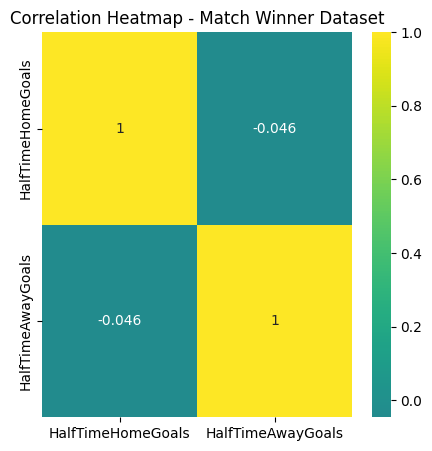

In [21]:
# Heatmap
plt.figure(figsize=(5,5))
sns.heatmap(corr, annot=True, cmap='viridis', center=0)
plt.title("Correlation Heatmap - Match Winner Dataset")
plt.show()

In [3]:

df = pd.DataFrame(data)

# --- Label encode the target column 'FullTimeResult' ---
label_encoder = LabelEncoder()
df['FullTimeResult_Encoded'] = label_encoder.fit_transform(df['FullTimeResult'])

print("Label encoded target:")
print(df[['FullTimeResult', 'FullTimeResult_Encoded']])
print()



Label encoded target:
  FullTimeResult  FullTimeResult_Encoded
0              H                       2
1              D                       1
2              A                       0
3              H                       2
4              D                       1



In [6]:

# Sample target column
full_time_result = ['H', 'D', 'A', 'H', 'D']

# Convert to DataFrame
df = pd.DataFrame({'FullTimeResult': full_time_result})

# One-hot encode target
one_hot_target = pd.get_dummies(df['FullTimeResult'])

print(one_hot_target)


       A      D      H
0  False  False   True
1  False   True  False
2   True  False  False
3  False  False   True
4  False   True  False


In [29]:
#display dataset
df.head()

,HomeTeam,AwayTeam,FullTimeResult,HalfTimeHomeGoals,HalfTimeAwayGoals,HalfTimeResult
0,12,26,2,2,0,2
1,13,43,2,1,0,2
2,14,28,0,1,1,1
3,16,36,1,1,2,0
4,22,17,2,2,0,2


In [38]:
#Model Training
# Define features (X) and target (Y)
X = df.drop("FullTimeResult", axis=1)   # all columns except target
Y = df["FullTimeResult"]                # target variable

In [36]:
print(X)

      HomeTeam  AwayTeam  HalfTimeHomeGoals  HalfTimeAwayGoals  HalfTimeResult
0           12        26                  2                  0               2
1           13        43                  1                  0               2
2           14        28                  1                  1               1
3           16        36                  1                  2               0
4           22        17                  2                  0               2
...        ...       ...                ...                ...             ...
9367         6        27                  1                  0               2
9369        31         8                  0                  1               0
9372        17        21                  2                  1               2
9374         0         6                  1                  0               2
9375         8        27                  2                  1               2

[6676 rows x 5 columns]


In [40]:

print(Y)

0       2
1       2
2       0
3       1
4       2
       ..
9367    1
9369    0
9372    1
9374    0
9375    2
Name: FullTimeResult, Length: 6676, dtype: int64


In [18]:
#Model Training
# Define features (X) and target (Y)
X = df.drop("FullTimeResult", axis=1)   # all columns except target
Y = df["FullTimeResult"]                # target variable

In [35]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (7504, 21)
Test shape: (1876, 21)


In [40]:
# Make predictions
y_pred = model.predict(X_test)


In [45]:
# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9952025586353944

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       539
           1       0.99      0.99      0.99       474
           2       1.00      1.00      1.00       863

    accuracy                           1.00      1876
   macro avg       1.00      0.99      0.99      1876
weighted avg       1.00      1.00      1.00      1876


Confusion Matrix:
 [[539   0   0]
 [  2 468   4]
 [  0   3 860]]


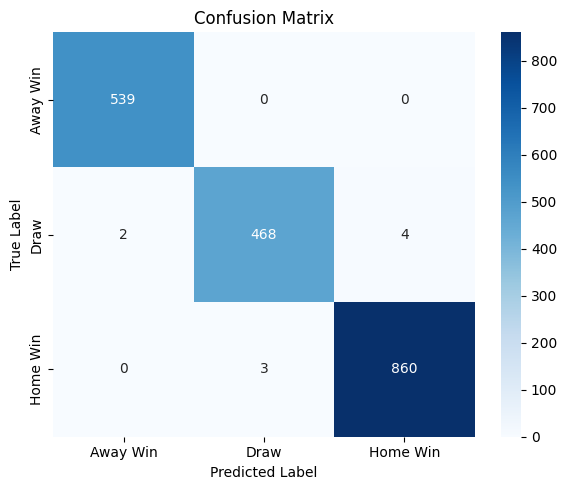

In [42]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# 📊 Plot using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()
